# Finding the best chocolate bars

## 📖 Background
You work at a specialty foods import company that wants to expand into gourmet chocolate bars. Your boss needs your team to research this market to inform your initial approach to potential suppliers.

After finding valuable chocolate bar ratings online, you need to explore if the chocolate bars with the highest ratings share any characteristics that could help you narrow your search for suppliers (e.g., cacao percentage, bean country of origin, etc.)

## 💾 The data

#### Your team created a file with the following information ([source](https://flavorsofcacao.com)):
- "id" - id number of the review
- "manufacturer" - Name of the bar manufacturer
- "company_location" - Location of the manufacturer
- "year_reviewed" - From 2006 to 2021
- "bean_origin" - Country of origin of the cacao beans
- "bar_name" - Name of the chocolate bar
- "cocoa_percent" - Cocoa content of the bar (%)
- "num_ingredients" - Number of ingredients
- "ingredients" - B (Beans), S (Sugar), S* (Sweetener other than sugar or beet sugar), C (Cocoa Butter), (V) Vanilla, (L) Lecithin, (Sa) Salt
- "review" - Summary of most memorable characteristics of the chocolate bar
- "rating" - 1.0-1.9 Unpleasant, 2.0-2.9 Disappointing, 3.0-3.49 Recommended, 3.5-3.9 Highly Recommended, 4.0-5.0 Oustanding

***Acknowledgments**: Brady Brelinski, Manhattan Chocolate Society*

In [1]:
#import necessary modules
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read the data
choco_bars = pd.read_csv("chocolate_bars.csv")

#check data info
choco_bars.info()

#view the first fifteen rows
display(choco_bars.head(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2443 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.5+ KB


,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
5,2546,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",80.0,3.0,"B,S,C","mildly bitter, basic cocoa, fatty",3.25
6,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68.0,3.0,"B,S,C","milk brownie, macadamia,chewy",3.50
7,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,4.0,"B,S,C,L","vegetal, nutty",3.50
8,797,A. Morin,France,2012,Peru,Peru,63.0,4.0,"B,S,C,L","fruity, melon, roasty",3.75
9,1011,A. Morin,France,2013,Panama,Panama,70.0,4.0,"B,S,C,L","brief fruit note, earthy, nutty",2.75


As shown above, num_ingredients and ingredients have 87 missing values. Best to drop them as the number is insignificiant.

In [3]:
#drop null values
choco_bars_new = choco_bars.dropna()
choco_bars_new

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"B,S,C","fatty, mild nuts, mild fruit",3.25


In [4]:
#average rating by country of origin
choco_avg_rating = choco_bars_new.groupby('bean_origin').rating.mean().round(2)
choco_avg_rating.sort_values()

bean_origin
Puerto Rico              2.71
Martinique               2.75
St.Vincent-Grenadines    2.75
Sierra Leone             2.75
Principe                 2.75
                         ... 
Thailand                 3.30
Congo                    3.32
Solomon Islands          3.45
Sao Tome & Principe      3.50
China                    3.50
Name: rating, Length: 62, dtype: float64

The highest average rating(3.50) by Country is China, and the lowest average rating(2.71) is Puerto Rico. 

In [5]:
#bars reviewed for each of those countries
reviewed_bars = choco_bars_new.groupby("bean_origin")["review"].agg("count")
reviewed_bars.sort_values()

bean_origin
Martinique                 1
Principe                   1
DR Congo                   1
St.Vincent-Grenadines      1
China                      1
                        ... 
Madagascar               171
Ecuador                  201
Dominican Republic       220
Peru                     231
Venezuela                246
Name: review, Length: 62, dtype: int64

There are a number of low reviewed bars by Country, of which we have Martinique, Principe, even China, which has the highest average rating, etc... The highest reviewed bars(246) by Country is Venezuela. 

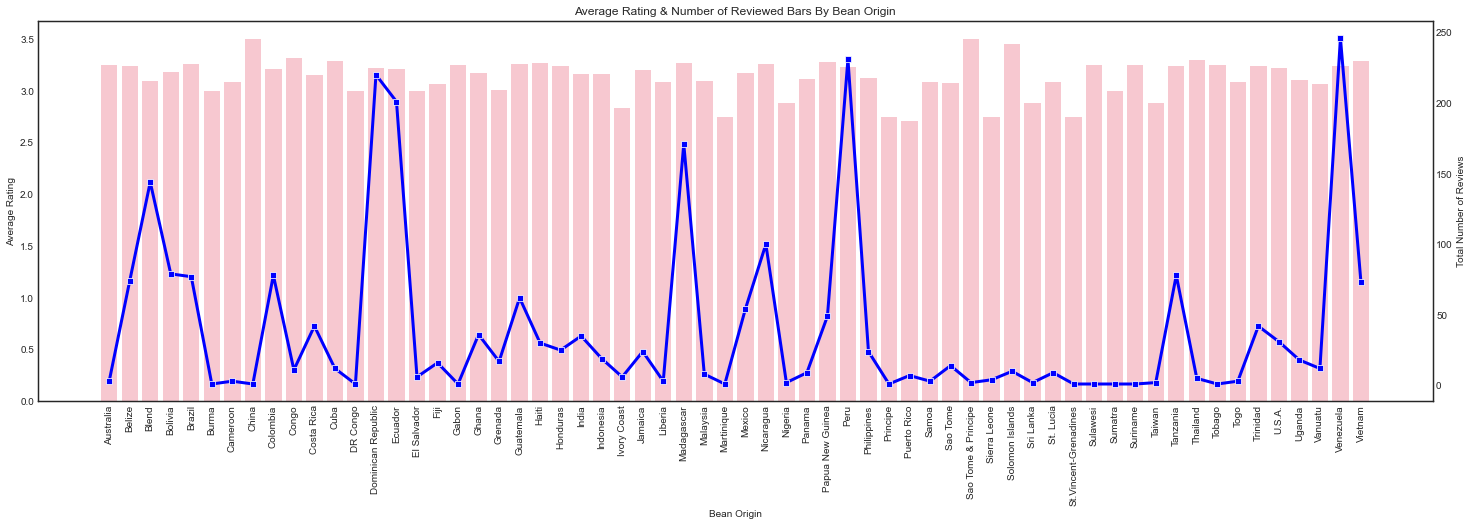

In [6]:
#visualization for average rating and reviewed bars by 'bean_origin'
plt.style.use('seaborn-v0_8-white')

#set figsize
plt.figure(figsize=(25, 7))

#first plot- barplot
ax=sns.barplot(x=choco_avg_rating.index, y=choco_avg_rating.values, color='pink')

#rotate the x-ticks for better understanding
plt.xticks(rotation=90)

#second plot- lineplot
ax2 = ax.twinx()
sns.lineplot(x=reviewed_bars.index, y=reviewed_bars.values, marker='s', color='blue', lw=3, ax=ax2)

#set the x-, first plot y-, and second plot y- axis labels
ax.set_xlabel('Bean Origin')
ax.set_ylabel('Average Rating')
ax2.set_ylabel('Total Number of Reviews')

#set plot title
plt.title("Average Rating & Number of Reviewed Bars By Bean Origin")

#show the plot
plt.show()

From the visualization above, representing the lines are the reviewed bars. Venezuela indeed has the highest number of reviewed bars, and a couple of low reviewed bars including China, DR Congo, etc... Also, representing the average rating are the bars. The highest average rating is China and the lowest is Puerto Rico.

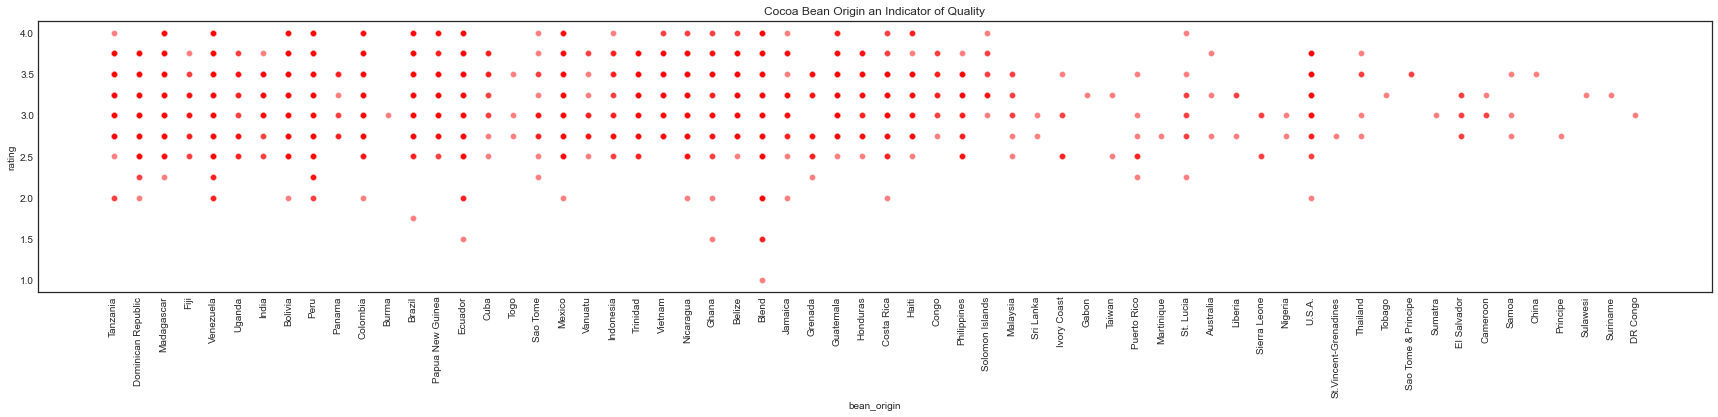

In [7]:
#Is the cocoa bean's origin an indicator of quality?
plt.figure(figsize=(30, 5))
plt.xticks(rotation = 90)
sns.scatterplot(x='bean_origin', y='rating', data=choco_bars_new, alpha=0.5, color='red')
plt.title('Cocoa Bean Origin an Indicator of Quality');

The 'rating' indicates the quality and from the visualization above, there is no correlation between the bean's origin and the rating. Some countries have from recommended to outstanding ratings, notwithstanding, the bean's origin doesn't indicate the quality.

In [8]:
#How does cocoa content relate to rating? 
corr = np.corrcoef(choco_bars_new.cocoa_percent, choco_bars_new.rating)
p = pearsonr(choco_bars_new.cocoa_percent, choco_bars_new.rating)

print('The correlation between cocoa percent and rating is', corr[0,1].round(4))
print('The p-value is', p[1].round(4))

The correlation between cocoa percent and rating is -0.0772
The p-value is 0.0001


There is a negative-weak correlation between cocoa percent and rating. The p-value is lesser than 0.05, hence indicates a statistically significant correlation between the two variables. Let's visualize!

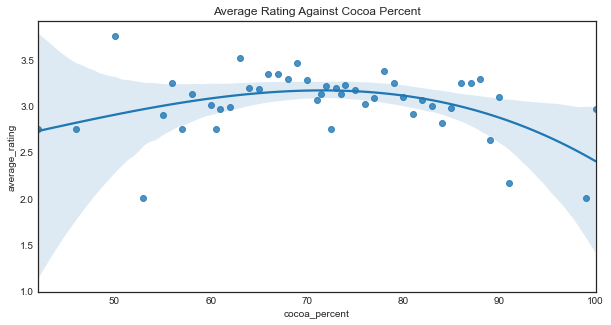

In [9]:
#average rating by cocoa_percent
cpr = choco_bars_new.groupby('cocoa_percent').rating.mean()

#a regplot to visualize the relationship between cocoa percent and rating
plt.figure(figsize=(10, 5))
sns.regplot(x=cpr.index, y=cpr.values, order=3)
plt.ylabel('average_rating')
plt.title('Average Rating Against Cocoa Percent')
plt.show();

From the visualization above, there are high ratings for about 70% cocoa content, hence people prefer chocolate bars with 70% cocoa.  

In [10]:
#What is the average cocoa content for bars with higher ratings (above 3.5)?
higher_rating = choco_bars_new[choco_bars_new['rating'] > 3.5]
avg_cocoa_higher_rating = higher_rating.groupby('rating').cocoa_percent.mean().round(2)
avg_cocoa_higher_rating

rating
3.75    71.11
4.00    70.70
Name: cocoa_percent, dtype: float64

Analysis confirmed! The cocoa percent for the highest rating(4.00) is 70.70%

In [11]:
#The research indicates that some consumers want to avoid bars with lecithin. 
#Let's compare the average rating of bars with and without lecithin (L in the ingredients).
print(choco_bars_new.ingredients.unique())

choco_bars_new['lec_bars'] = choco_bars_new['ingredients'].str.contains(pat='L')
avg_lec_rating = choco_bars_new.groupby('lec_bars').rating.mean().round(2)
print('average rating of bars without lecithin is', avg_lec_rating.values[0])
print('average rating of bars with lecithin is', avg_lec_rating.values[1])

['B,S,C' 'B,S,C,L' 'B,S' 'B,S,C,V' 'B,S,C,V,L' 'B,S,C,V,L,Sa' 'B,S,C,V,Sa'
 'B,S,V,L' 'B,S*' 'B' 'B,S*,C' 'B,S,L' 'B,S,V' 'B,S*,C,L' 'B,S*,C,Sa'
 'B,S*,Sa' 'B,S,C,Sa' 'B,S*,V,L' 'B,C' 'B,S*,C,V' 'B,S,C,L,Sa']
average rating of bars without lecithin is 3.23
average rating of bars with lecithin is 3.15


The difference between the average ratings is small, notwithstanding, people prefer chocolate bars without lecithin.

In [12]:
#average rating by number of ingredients
avg_rating_num_ing = choco_bars_new.groupby('num_ingredients').rating.mean().round(2)
avg_rating_num_ing

num_ingredients
1.0    2.96
2.0    3.22
3.0    3.27
4.0    3.13
5.0    3.08
6.0    2.94
Name: rating, dtype: float64

The highest rating is for three ingredients.

In [13]:
#statistically, is there any significant correlation between the two variables
corr_p = pearsonr(avg_rating_num_ing.index, y=avg_rating_num_ing.values)
print('The correlation is', corr_p[0].round(2))
print('The p-value is', corr_p[1].round(2))

The correlation is -0.26
The p-value is 0.61


The two variables are negatively-correlated, and the p-value is below 0.05, hence no statistically significant correlation between the variables.

So many reviews, let's visualize!

In [14]:
#taking a look at reviews and rating
#expand the reviews column
choco_review = choco_bars_new['review'].str.split(',', expand=True)

#concat the working dataframe and the expanded review
choco_bars_latest = pd.concat([choco_bars_new, choco_review], axis=1)
choco_review_new = pd.melt(choco_bars_latest, id_vars=["rating"], value_vars=choco_review.columns).dropna()

print('The number of unique reviews is', choco_review_new.value.nunique())
#check the 20largest number of reviews
choco_review_new2 = choco_review_new["value"].value_counts().nlargest(20)
choco_review_new3 = choco_review_new.loc[choco_review_new['value'].isin([' cocoa', ' sweet', ' nutty', 'creamy', ' roasty', ' earthy', 'sandy',
       ' sour', ' floral', 'intense', 'sweet', 'nutty', ' fatty', ' spicy',
       'fatty', ' fruit', ' woody', 'sticky', ' coffee', ' vanilla'])]
avg_rating_review = choco_review_new3.groupby('value').rating.mean().round(2)
avg_rating_review

The number of unique reviews is 1202


value
 cocoa      3.41
 coffee     3.29
 earthy     3.04
 fatty      3.11
 floral     3.26
 fruit      3.34
 nutty      3.30
 roasty     3.22
 sour       3.00
 spicy      3.31
 sweet      3.05
 vanilla    2.89
 woody      3.16
creamy      3.48
fatty       3.04
intense     3.21
nutty       3.27
sandy       3.09
sticky      3.16
sweet       3.07
Name: rating, dtype: float64

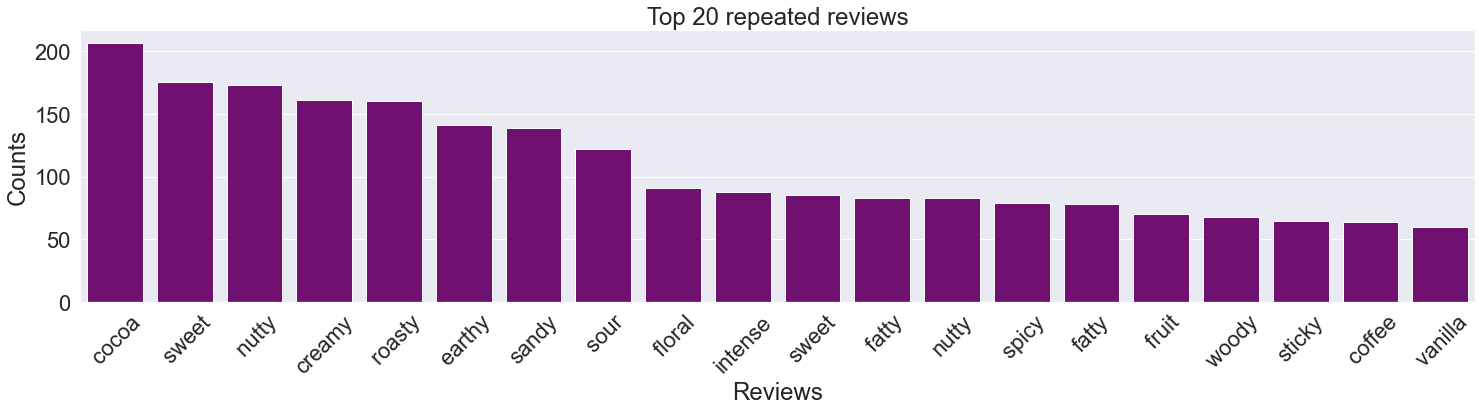

In [15]:
plt.figure(figsize=(25, 5))
sns.set(font_scale=2)
ax = sns.barplot(x=choco_review_new2.index,y=choco_review_new2.values, color='purple')
plt.xticks(rotation=45)
ax.set_xlabel('Reviews')
ax.set_ylabel('Counts')
plt.title("Top 20 repeated reviews")
plt.show()

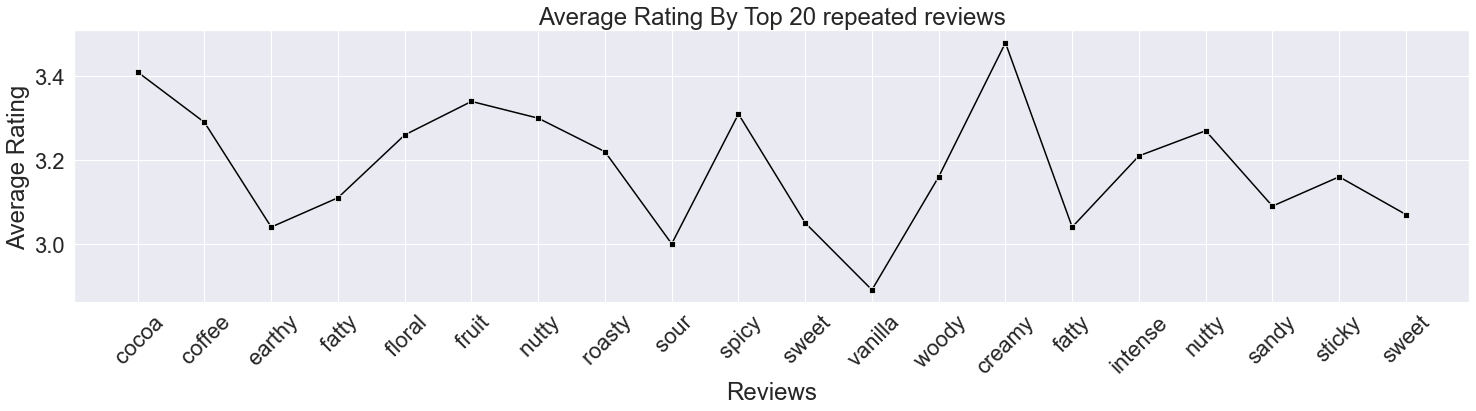

In [16]:
plt.figure(figsize=(25, 5))
sns.set(font_scale=2)
ax = sns.lineplot(x=avg_rating_review.index,y=avg_rating_review.values,marker='s', color='black')
plt.xticks(rotation=45)
ax.set_xlabel('Reviews')
ax.set_ylabel('Average Rating')
plt.title("Average Rating By Top 20 repeated reviews")
plt.show();

From the top 20 repeated words in the reviews, the most frequent word is "cocoa".The highest average rating is 3.48 for "creamy" review, and "vanilla" has the lowest average rating, which is 2.89.

## Summary
- China has the highest average rating of chocolate bars(3.50), and Puerto Rico has the lowest(2.71)
- Venezuela has the highest number of reviewed bars(246), and there are more than one low number of reviewed bars(1), of which Martinique, DR Congo and China are among.
- There is no relationship between 'reviews' and 'bean origin'
- There is a negatively-weak correlation between 'cocoa percent' and 'rating', notwithstanding, there exist a statistically significant correlation
- High ratings for about 70% cocoa content
- People prefer chocolate bars without lecithin
- High ratings are seen in three ingredients, although there's no correlation between the number of ingredients and rating
- There are 1202 unique reviews of chocolate bars. 
- People prefer creamy chocolate bars to vanilla chocolate bars.

## Recommendations
- Make chocolate bars with 70% cocoa content.
- Avoid putting lecithin in the chocolate bars.
- Produce more creamy chocolate bars than vanilla.
- Make more research!